In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt

In [15]:
datos=pd.read_csv("data_01.txt", sep="\t")
datos

,fecha,idTerminal,oper
0,2017-01-31 08:19:33.000,1828,0
1,2017-01-31 08:47:16.000,1828,1
2,2017-01-31 08:48:07.000,1828,1
3,2017-01-31 08:48:58.000,1828,1
4,2017-01-31 08:49:53.000,1828,1
...,...,...,...
775461,2017-05-31 23:53:06.000,1980,7
775462,2017-05-31 23:54:46.000,1980,7
775463,2017-05-31 23:57:03.000,1964,4
775464,2017-05-31 23:58:15.000,1964,0


In [16]:
name = datos["fecha"].str.split(expand=True)
name.columns = ['fecha', 'tiempo']
df = pd.concat([datos, name], axis=1)
df

,fecha,idTerminal,oper,fecha,tiempo
0,2017-01-31 08:19:33.000,1828,0,2017-01-31,08:19:33.000
1,2017-01-31 08:47:16.000,1828,1,2017-01-31,08:47:16.000
2,2017-01-31 08:48:07.000,1828,1,2017-01-31,08:48:07.000
3,2017-01-31 08:48:58.000,1828,1,2017-01-31,08:48:58.000
4,2017-01-31 08:49:53.000,1828,1,2017-01-31,08:49:53.000
...,...,...,...,...,...
775461,2017-05-31 23:53:06.000,1980,7,2017-05-31,23:53:06.000
775462,2017-05-31 23:54:46.000,1980,7,2017-05-31,23:54:46.000
775463,2017-05-31 23:57:03.000,1964,4,2017-05-31,23:57:03.000
775464,2017-05-31 23:58:15.000,1964,0,2017-05-31,23:58:15.000


In [17]:
df= df.iloc[:,1:4]
df

,idTerminal,oper,fecha
0,1828,0,2017-01-31
1,1828,1,2017-01-31
2,1828,1,2017-01-31
3,1828,1,2017-01-31
4,1828,1,2017-01-31
...,...,...,...
775461,1980,7,2017-05-31
775462,1980,7,2017-05-31
775463,1964,4,2017-05-31
775464,1964,0,2017-05-31


In [18]:
def crear_const(x):
    if x>=0:
        return 1

df['trx']= df['oper'].apply(crear_const)

In [19]:
df

,idTerminal,oper,fecha,trx
0,1828,0,2017-01-31,1
1,1828,1,2017-01-31,1
2,1828,1,2017-01-31,1
3,1828,1,2017-01-31,1
4,1828,1,2017-01-31,1
...,...,...,...,...
775461,1980,7,2017-05-31,1
775462,1980,7,2017-05-31,1
775463,1964,4,2017-05-31,1
775464,1964,0,2017-05-31,1


In [22]:
df[['idTerminal','trx']].groupby('idTerminal').sum().reset_index()

,idTerminal,trx
0,1507,4496
1,1515,4325
2,1537,11346
3,1574,10791
4,1575,20448
5,1577,18998
6,1582,11224
7,1593,23014
8,1594,10258
9,1597,9188


In [23]:
df2= df[(df['idTerminal']==1774)|(df['idTerminal']==1908)|(df['idTerminal']==1964)|(df['idTerminal']==1910)|(df['idTerminal']==1980)]

In [25]:
df[['oper','trx']].groupby('oper').sum().reset_index()

,oper,trx
0,0,423929
1,1,79195
2,2,7526
3,3,127399
4,4,35817
5,5,16124
6,6,6066
7,7,50662
8,8,3292
9,9,4600


In [26]:
df3= df2[(df2['oper']==0)|(df2['oper']==3)|(df2['oper']==1)|(df2['oper']==7)|(df2['oper']==4)]
df3

,idTerminal,oper,fecha,trx
442,1964,3,2017-01-31,1
446,1964,0,2017-01-31,1
459,1964,0,2017-01-31,1
467,1964,4,2017-01-31,1
475,1964,0,2017-01-31,1
...,...,...,...,...
775454,1910,0,2017-05-31,1
775461,1980,7,2017-05-31,1
775462,1980,7,2017-05-31,1
775463,1964,4,2017-05-31,1


<AxesSubplot: xlabel='oper'>

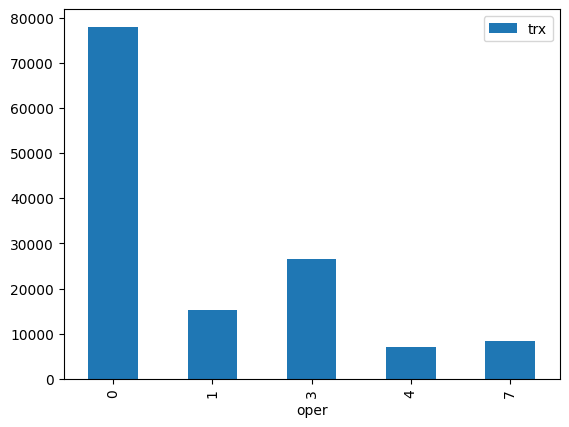

In [29]:
### Distribucion operaciones
df3[['oper','trx']].groupby('oper').sum().plot(kind='bar')


<AxesSubplot: xlabel='idTerminal'>

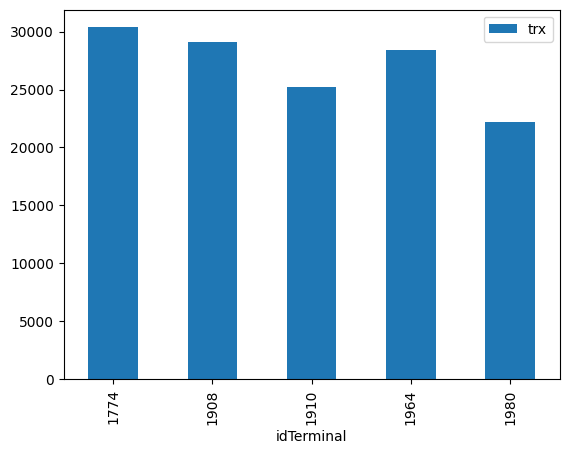

In [30]:
## Distribucion Terminal
df3[['idTerminal','trx']].groupby('idTerminal').sum().plot(kind='bar')

<AxesSubplot: xlabel='fecha'>

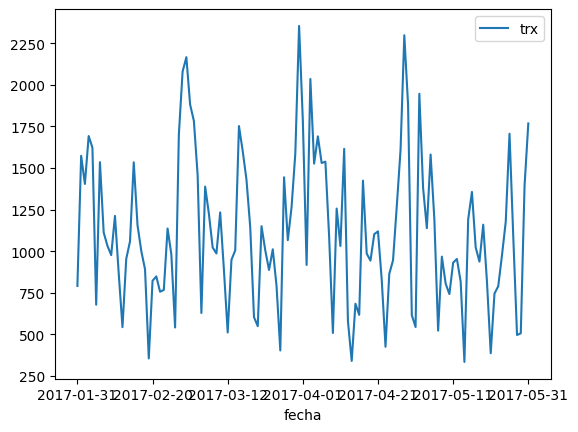

In [33]:
### Tendencia General por dia
df3[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')

C:\Users\TRUDATA\AppData\Local\Temp\ipykernel_8736\2701174402.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['mes']= df3['fecha'].apply(crear_mes)


<AxesSubplot: xlabel='mes'>

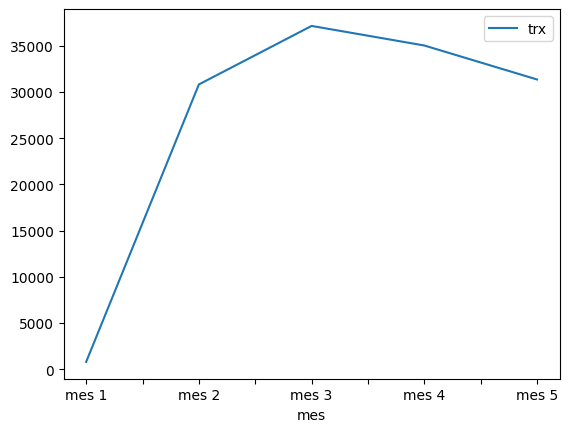

In [52]:
# Tendencia por mes
def crear_mes(x):
    if x>='2017-01-31' and x<'2017-02-01':
        return 'mes 1'
    elif x>='2017-02-01' and x<'2017-03-01':
        return 'mes 2'
    elif x>='2017-03-01' and x<'2017-04-01':
        return 'mes 3'
    elif x>='2017-04-01' and x<'2017-05-01':
        return 'mes 4'
    elif x>='2017-05-01' and x<'2017-06-01':
        return 'mes 5'

df3['mes']= df3['fecha'].apply(crear_mes)

df3[['trx','mes']].groupby(['mes']).sum().plot(kind='line')

C:\Users\TRUDATA\AppData\Local\Temp\ipykernel_8736\3642729597.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['quincena']= df3['fecha'].apply(crear_quincena)


<AxesSubplot: xlabel='quincena'>

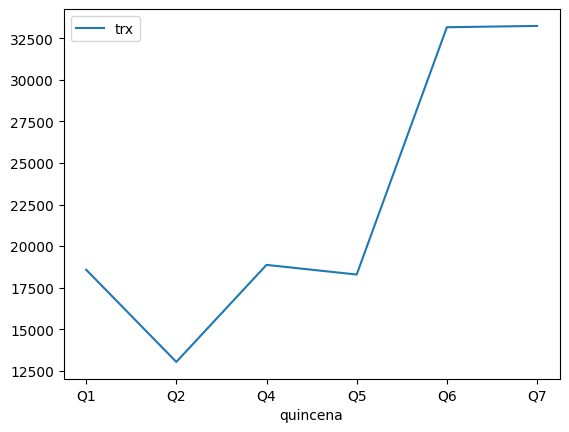

In [53]:
#Tendencia por quincena

def crear_quincena(x):
    if x>='2017-01-31' and x<='2017-02-15':
        return 'Q1'
    elif x>'2017-02-15' and x<'2017-03-01':
        return 'Q2'
    elif x>='2017-03-01' and x<='2017-03-15':
        return 'Q4'
    elif x>'2017-03-15' and x<'2017-04-01':
        return 'Q5'
    elif x>='2017-04-01' and x<='2017-04-15':
        return 'Q6'
    elif x>'2017-04-15' and x<'2017-05-01':
        return 'Q7'
    elif x>='2017-05-01' and x<='2017-05-15':
        return 'Q6'
    elif x>'2017-05-15':
        return 'Q7'

df3['quincena']= df3['fecha'].apply(crear_quincena)
df3[['trx','quincena']].groupby(['quincena']).sum().plot(kind='line')

In [35]:
## Tendencia por operacion
oper_0= df2[(df2['oper']==0)]
oper_3= df2[(df2['oper']==3)]
oper_1= df2[(df2['oper']==1)]
oper_7= df2[(df2['oper']==7)]
oper_4= df2[(df2['oper']==4)]



<AxesSubplot: xlabel='fecha'>

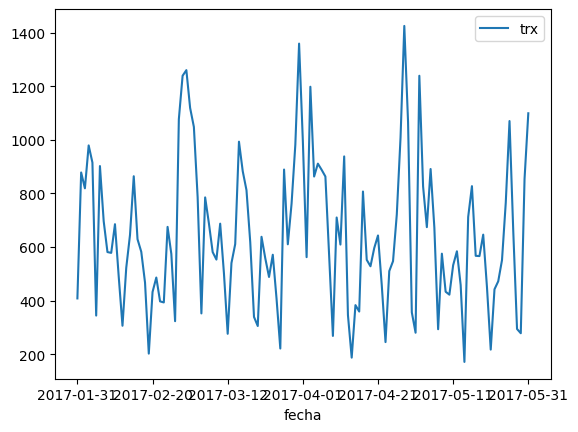

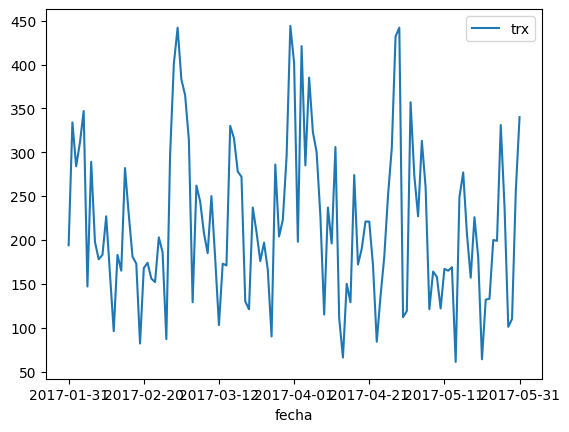

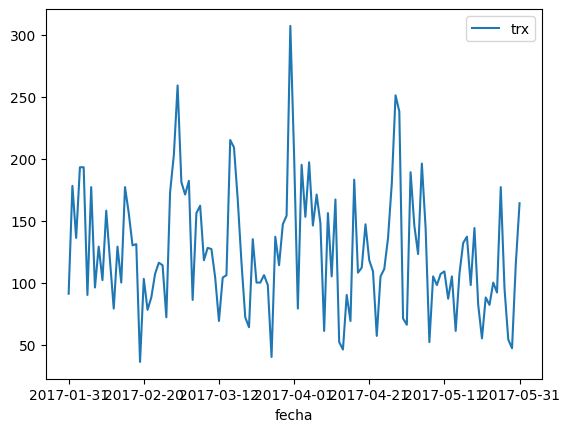

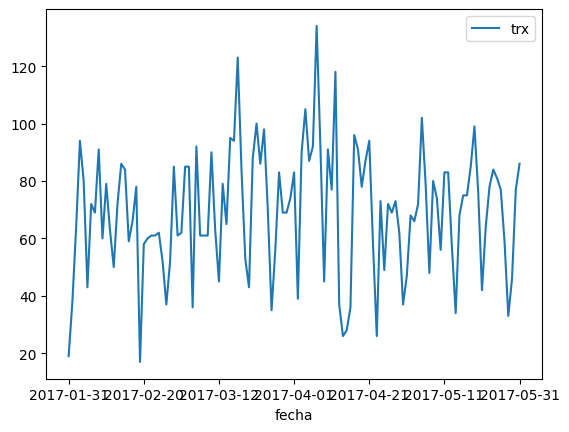

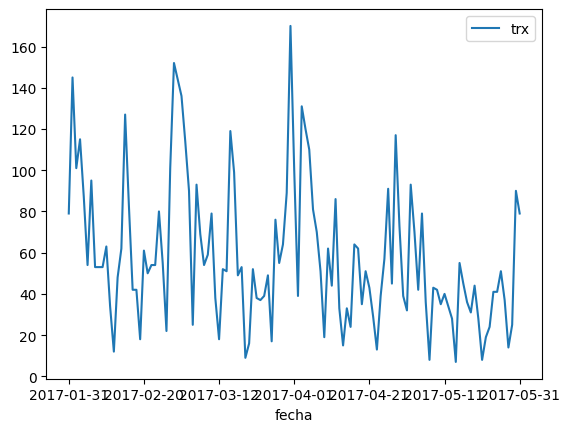

In [37]:
oper_0[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')
oper_3[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')
oper_1[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')
oper_7[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')
oper_4[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')

<AxesSubplot: xlabel='fecha'>

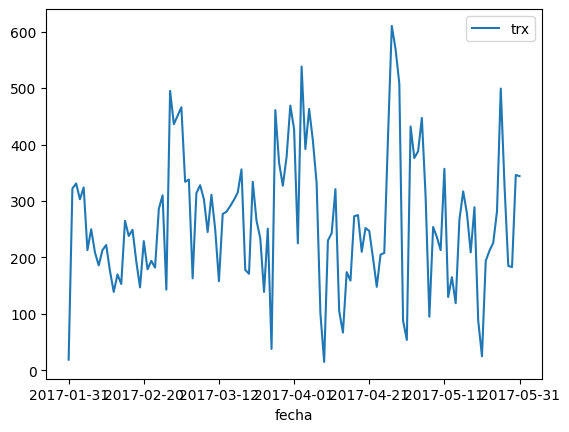

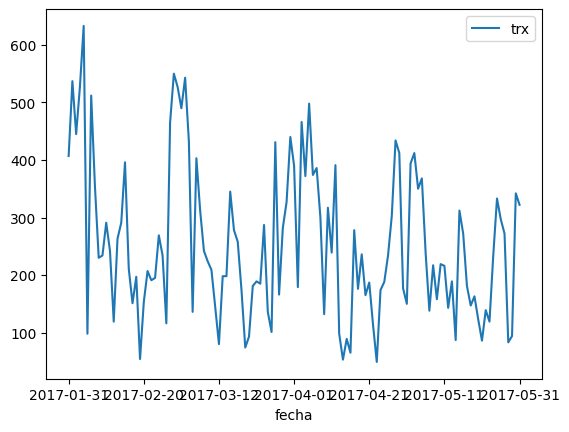

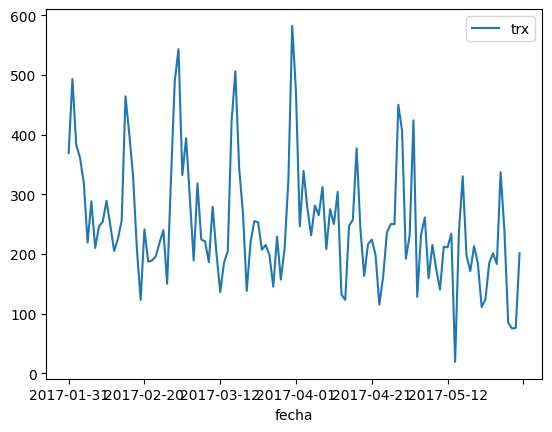

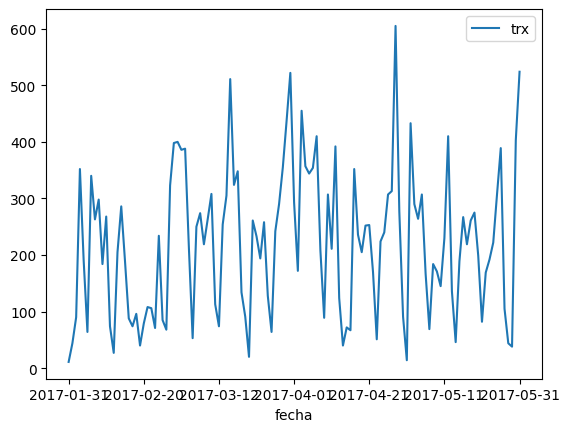

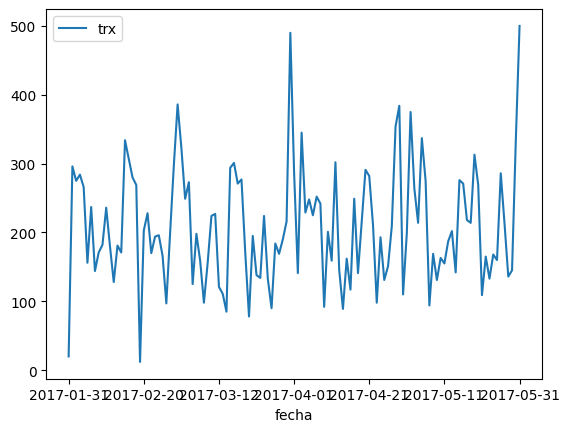

In [38]:
## Tendencia por Terminal
df2= df[(df['idTerminal']==1774)|(df['idTerminal']==1908)|(df['idTerminal']==1964)|(df['idTerminal']==1910)|(df['idTerminal']==1980)]
term0 = df2[(df2['idTerminal'] == 1774)]
term1 = df2[(df2['idTerminal'] == 1908)]
term2 = df2[(df2['idTerminal'] == 1964)]
term3 = df2[(df2['idTerminal'] == 1910)]
term4 = df2[(df2['idTerminal'] == 1980)]

term0[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')
term1[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')
term2[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')
term3[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')
term4[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')